In [12]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv("boston.csv")
df.columns.values[-1]="Price"
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [14]:
x=df.iloc[:,:-1]
y=df["Price"].values

In [15]:
#train test split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [16]:
#standardizing the dataset only standarize the input value not out put 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
X_train=scaler.fit_transform(X_train)

In [18]:
X_test=scaler.transform(X_test)

In [ ]:
# you can do inverse transform  as well 
# X_train=scaler.inverse_transform(X_train)

In [19]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [20]:
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [21]:
mse=cross_val_score(regression,X_train,Y_train, scoring='neg_mean_squared_error', cv=10)

In [22]:
np.mean(mse)

-25.550660791660796

In [24]:
#prediction
reg_pred=regression.predict(X_test)

In [25]:
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

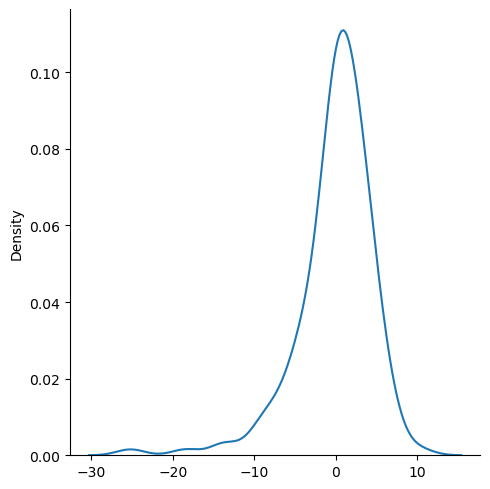

In [26]:
# Accuracy of the predicted values 
sns.displot(reg_pred-Y_test, kind="kde")

In [27]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,Y_test)

In [28]:
score

0.6693702691495591

Ridge Regression

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [29]:
ridge_regressor=Ridge()

In [31]:
ridge_regressor

Ridge()

In [32]:
parameters={"alpha":[1,2,5,10,20,30,40,50,60,70.80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70.8, 90]},
             scoring='neg_mean_squared_error')

In [34]:
# best parameters 
ridgecv.best_params_

{'alpha': 10}

In [35]:
ridgecv.best_score_

-25.807228822291478

In [36]:
ridge_pred=ridgecv.predict(X_test)

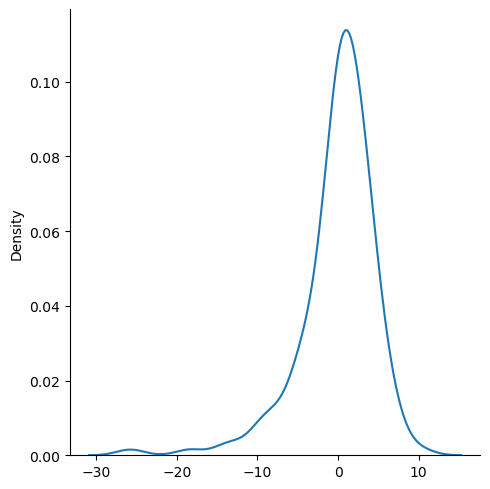

In [40]:
sns.displot(ridge_pred-Y_test, kind="kde")

In [42]:
score=r2_score(ridge_pred,Y_test)

In [43]:
score

0.6468557055633652

                                                        Lasso Regression

In [46]:
from sklearn.linear_model import Lasso

In [47]:
lasso=Lasso()

In [50]:
parameters={"alpha":[1,2,5,10,20,30,40,50,60,70.80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lassocv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70.8, 90]},
             scoring='neg_mean_squared_error')

In [51]:
lassocv.best_params_


{'alpha': 1}

In [52]:
lassocv.best_score_

-31.153603752119004

In [56]:
lasso_pred=lassocv.predict(X_test)

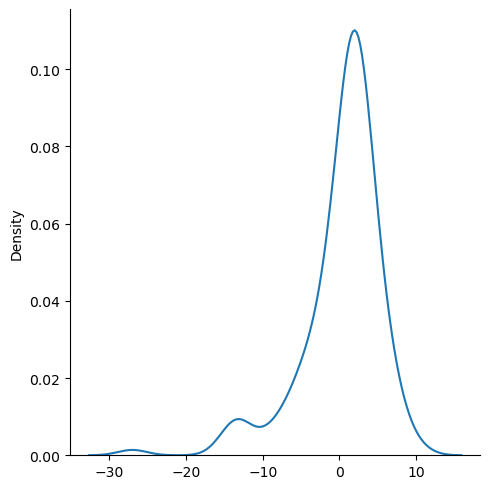

In [57]:
sns.displot(lasso_pred-Y_test,kind="kde")

In [59]:
score=r2_score(lasso_pred,Y_test)

In [60]:
score

0.32577461229516547